# Unit 5 - Financial Planning


In [42]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [43]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [44]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [45]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [46]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_content = btc_data.content
btc=btc_data.json()

import json
print(json.dumps(btc, indent=4))

btc_price = btc["data"]["1"]["quotes"]["USD"]["price"]
print (btc_price)

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_content = btc_data.content
eth=eth_data.json()

import json
print(json.dumps(eth, indent=4))

eth_price = eth["data"]["1027"]["quotes"]["USD"]["price"]
print (eth_price)


# Compute current value of my crpto
my_btc_value= my_btc*btc_price
my_eth_value= my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18523293,
            "total_supply": 18523293,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 12784.9,
                    "volume_24h": 27432549618,
                    "market_cap": 236818421562,
                    "percentage_change_1h": -0.519837092067804,
                    "percentage_change_24h": 7.11935051774457,
                    "percentage_change_7d": 11.892004557181,
                    "percent_change_1h": -0.519837092067804,
                    "percent_change_24h": 7.11935051774457,
                    "percent_change_7d": 11.892004557181
                },
                "CAD": {
                    "price": 16784.01672,
                    "volume_24h": 36013451138.5104,
                    "m

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg=200
my_spy=50

In [47]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-10-15 00:00:00-04:00  118.15  118.15  117.96  117.97  4977703  343.71   

                                                             
                             high     low   close    volume  
2020-10-15 00:00:00-04:00  348.02  343.13  347.51  50609035

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.97
Current SPY closing price: $347.51


In [11]:
# Compute the current value of shares
my_spy_value = spy_close_price* my_spy
my_agg_value = agg_close_price* my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17375.50
The current value of your 200 AGG shares is $23594.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income=12000

# Create savings DataFrame

savings_data = {
    "amount": [my_btc_value+my_eth_value,my_spy_value+my_agg_value]
}

savings_row=["crypto","shares"]

df_savings = pd.DataFrame(savings_data, index=savings_row)


# Display savings DataFrame
display(df_savings)

,amount
crypto,16175.843
shares,40969.500


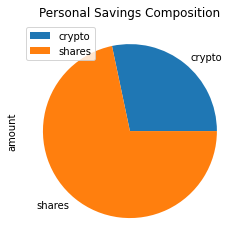

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings Composition")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings=float(df_savings.sum())

print(emergency_fund)
print(total_savings)

if total_savings > emergency_fund:
    print("Congratulations you have more than enough personal savings!!!")

elif total_savings == emergency_fund:
    print(f"Congratulations you have reached your financial goals!")    

else:
    print(f"You are {emergency_fund-total_savings} away from your financial goal!")   

# Validate saving health
    
emergency_fund = monthly_income * 10

if total_savings > emergency_fund:
    print("Congratulations you have more than enough personal savings!!!")
elif total_savings == emergency_fund:
    print(f"Congratulations you have reached your financial goals!")    
else:
    print(f"You are {emergency_fund-total_savings} away from your financial goal!")   

emergency_fund = total_savings

if total_savings > emergency_fund:
    print("Congratulations you have more than enough personal savings!!!")
elif total_savings == emergency_fund:
    print(f"Congratulations you have reached your financial goals!")    
else:
    print(f"You are {emergency_fund-total_savings} away from your financial goal!")  

36000
57145.343
Congratulations you have more than enough personal savings!!!
You are 62854.657 away from your financial goal!
Congratulations you have reached your financial goals!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG

ticker = ["SPY", "AGG"]

df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()




AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [21]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [117]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998889,0.998382,1.001564,0.999308,1.000626,1.003208,0.994847,1.000775,1.002576,1.000349,...,1.007732,1.003835,0.990947,0.994942,0.999279,0.998178,1.004726,1.002421,0.995644,0.997733
2,1.000511,0.993451,1.002984,1.000327,1.008864,1.000999,0.993813,1.002352,1.005409,1.008815,...,1.014499,1.007580,0.992161,0.996795,0.996216,0.994060,1.012683,1.000563,1.001120,1.008047
3,1.013242,0.990619,0.998491,0.998285,1.008074,0.998620,0.992378,0.999905,1.007987,1.005103,...,1.015020,1.008960,0.999824,0.993096,0.995640,0.993087,1.018372,0.999685,0.998400,1.020659
4,1.022491,0.983394,0.996762,0.994538,1.008108,0.994982,1.003252,1.002024,1.021365,1.011026,...,1.013835,1.008624,0.997430,0.995840,0.993465,1.003172,1.014176,0.998805,0.994832,1.014891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.109524,3.215190,6.912937,6.416798,2.634869,2.668169,9.902225,3.879593,7.037046,4.058274,...,3.583616,6.343802,5.104837,2.222522,4.536623,4.527492,4.045748,3.888300,6.185964,1.718093
7557,11.172426,3.206261,6.895482,6.443190,2.651106,2.666028,9.856864,3.857610,7.134980,4.042907,...,3.595767,6.353437,5.080061,2.222759,4.549650,4.535250,4.064823,3.878228,6.162930,1.722525
7558,11.111861,3.219965,6.861051,6.485682,2.655747,2.676185,9.810893,3.855307,7.141766,4.059608,...,3.593579,6.357450,5.115915,2.189214,4.559207,4.542886,4.112433,3.837397,6.201180,1.720001
7559,11.076507,3.221677,6.887790,6.435454,2.662613,2.683394,9.858186,3.882800,7.170070,4.090073,...,3.606053,6.312829,5.111522,2.214396,4.491605,4.576682,4.120988,3.835841,6.158154,1.729908


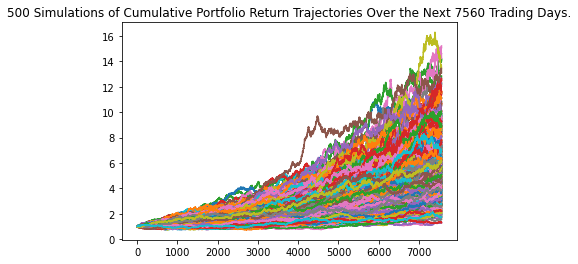

In [118]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

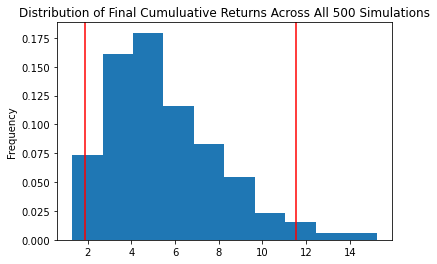

In [119]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [121]:
# Fetch summary statistics from the Monte Carlo simulation results
dist_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(dist_tbl)

count           500.000000
mean              5.489225
std               2.533004
min               1.292082
25%               3.684389
50%               4.954567
75%               6.896355
max              15.221389
95% CI Lower      1.868395
95% CI Upper     11.546575
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [127]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(dist_tbl[8]*initial_investment,2)
ci_upper = round(dist_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $37367.9 and $230931.5


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [128]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(dist_tbl[8]*initial_investment,2)
ci_upper = round(dist_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $56051.85 and $346397.25


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [22]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_fiveyr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.95,.05],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [23]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000419,0.992990,0.997796,1.000218,0.993740,1.002207,0.995363,0.999465,1.005037,1.001438,...,1.001603,0.998398,1.001114,1.002653,0.999594,1.001147,0.998527,0.997384,0.997439,0.996422
2,1.002576,0.991555,0.999000,1.002783,0.990147,1.001589,0.995402,0.996077,1.002648,0.999593,...,1.001121,0.998517,0.999712,1.005703,0.999664,1.004405,0.999520,0.998733,1.002336,0.996539
3,1.004822,0.995449,0.998351,1.006209,0.991353,0.995648,0.995436,0.988966,0.998149,0.999063,...,0.998189,0.996229,0.999000,1.010432,0.996065,1.003535,1.002497,1.003041,1.001399,0.994109
4,1.001961,0.999625,1.001255,1.005148,0.990920,0.993344,0.994414,0.993283,1.001027,1.002559,...,0.999706,0.997219,1.000125,1.007880,0.993813,1.004917,1.002227,0.999832,1.001948,0.994467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.180331,1.042410,1.073530,1.011904,1.017425,1.112610,1.102309,1.061214,1.173446,1.177726,...,1.121352,1.042108,1.283015,1.132345,0.974697,1.238721,1.037862,0.963458,1.150030,0.846004
1257,1.183195,1.038327,1.074261,1.014585,1.023965,1.114139,1.105676,1.055972,1.176097,1.174903,...,1.122832,1.043398,1.282019,1.129507,0.977196,1.239247,1.041425,0.965964,1.150779,0.850400
1258,1.190431,1.041346,1.073990,1.013691,1.027971,1.112030,1.108278,1.053421,1.182159,1.174230,...,1.125292,1.042609,1.283904,1.128749,0.970130,1.242241,1.039809,0.966004,1.148892,0.847363
1259,1.184335,1.038610,1.071365,1.010930,1.033420,1.114204,1.110575,1.050902,1.182088,1.177379,...,1.124526,1.040529,1.288000,1.135335,0.971798,1.242368,1.034571,0.966094,1.146015,0.852362


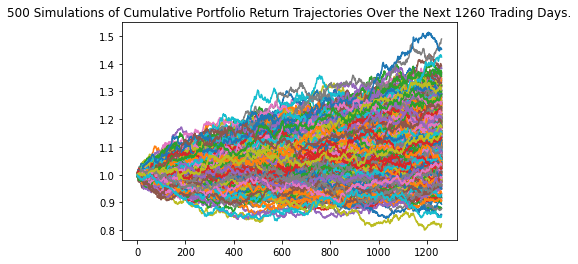

In [33]:
# Plot simulation outcomes
fiveyr_lineplot = MC_fiveyr_dist.plot_simulation()

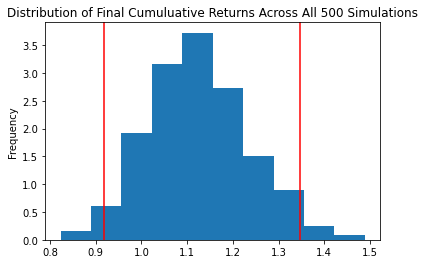

In [25]:
# Plot probability distribution and confidence intervals
fiveyr_plot = MC_fiveyr_dist.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyr_tbl = MC_fiveyr_dist.summarize_cumulative_return()

# Print summary statistics
print(fiveyr_tbl)

count           500.000000
mean              1.124108
std               0.110732
min               0.822955
25%               1.046583
50%               1.114404
75%               1.199940
max               1.488874
95% CI Lower      0.918725
95% CI Upper      1.347424
Name: 1260, dtype: float64


In [30]:
# Set initial investment
fiveyr_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(fiveyr_tbl[8]*fiveyr_investment,2)
ci_upper_five = round(fiveyr_tbl[9]*fiveyr_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${fiveyr_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55123.52 and $80845.45


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.95,.05],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997979,0.999589,0.994303,1.000496,1.006375,1.000839,1.000795,0.998511,0.997806,0.997080,...,1.001112,1.003730,0.998713,0.997458,0.996710,1.001869,1.001243,1.001441,0.999278,0.998054
2,0.993950,1.002748,0.993374,1.000091,1.006959,0.998805,1.001755,1.000074,0.998068,0.998823,...,0.999500,1.004860,0.999022,0.996622,1.002077,1.003076,1.005003,1.001082,1.000253,0.999381
3,0.992791,1.007177,0.992802,1.000502,1.009387,0.999112,1.002877,1.000426,0.996507,0.996652,...,0.995866,1.002594,1.000687,0.992687,1.002506,1.002131,1.006640,1.001389,1.004094,0.997000
4,0.989632,1.010154,0.992323,0.999938,1.007092,1.000515,1.008492,1.002435,0.994513,0.994996,...,0.989493,1.002960,1.004516,0.994970,1.002940,1.000167,1.008610,1.000518,1.003202,0.997715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.296370,1.168569,0.922820,1.168625,1.269001,1.259124,1.322068,1.062607,1.141315,1.077303,...,1.083204,1.406210,1.036774,1.503724,1.333819,1.304632,1.562267,1.311896,1.424009,1.380908
2517,1.298290,1.166943,0.920002,1.170931,1.266219,1.262621,1.320095,1.060418,1.139202,1.079335,...,1.072751,1.411126,1.036357,1.508756,1.333331,1.308220,1.559563,1.305179,1.425560,1.384185
2518,1.291388,1.166997,0.913748,1.171361,1.266571,1.263968,1.325933,1.062623,1.138420,1.078541,...,1.073975,1.416371,1.035803,1.509851,1.339415,1.312002,1.556148,1.302354,1.420010,1.381350
2519,1.291111,1.164544,0.914402,1.174002,1.268036,1.267689,1.328031,1.063934,1.140441,1.075805,...,1.075049,1.419875,1.038769,1.514369,1.339298,1.314686,1.554490,1.296844,1.425250,1.382004


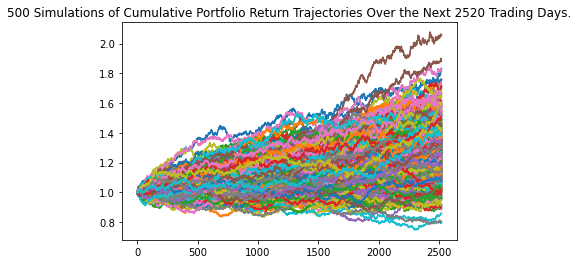

In [36]:
# Plot simulation outcomes
tenyr_lineplot = MC_tenyr_dist.plot_simulation()

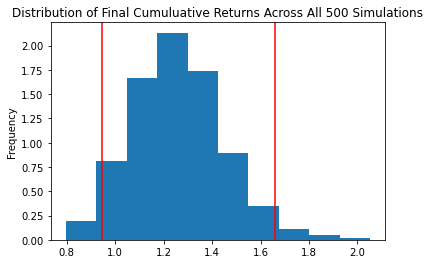

In [37]:
# Plot probability distribution and confidence intervals
tenyr_plot = MC_tenyr_dist.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyr_tbl = MC_tenyr_dist.summarize_cumulative_return()

# Print summary statistics
print(tenyr_tbl)

count           500.000000
mean              1.261869
std               0.188451
min               0.795732
25%               1.127311
50%               1.250400
75%               1.377299
max               2.052719
95% CI Lower      0.946679
95% CI Upper      1.660635
Name: 2520, dtype: float64


In [41]:
# Set initial investment
tenyr_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tenyr_tbl[8]*tenyr_investment,2)
ci_upper_ten = round(tenyr_tbl[9]*tenyr_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${tenyr_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $56800.76 and $99638.12
